In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [4]:
y, sr = librosa.load("5_second_song-youtube-Mj2XPAXlaI8-251.wav")
y_fast = librosa.effects.time_stretch(y, 2.5)

In [5]:
D = librosa.stft(y)

D_fast = librosa.stft(y_fast)

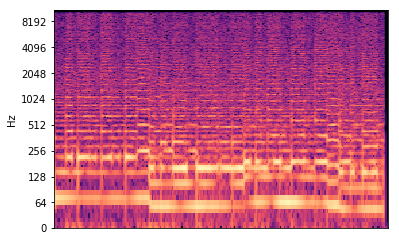

In [22]:
rep = np.abs(np.max(D))
rep1 = np.abs(np.max(D_fast))

librosa.display.specshow(librosa.amplitude_to_db(D, ref=rep ), y_axis="log")

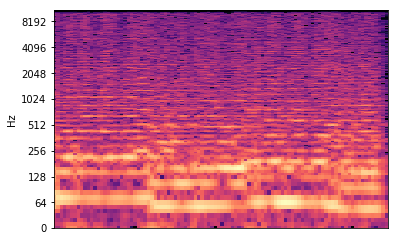

In [23]:
librosa.display.specshow(librosa.amplitude_to_db(D_fast, ref=rep1 ), y_axis="log")

librosa.output.write_wav("bleh.wav", y_fast, sr)

In [41]:
D_harmonic, D_percussive = librosa.decompose.hpss(D)
Dfast_harmonic, Dfast_percussive = librosa.decompose.hpss(D_fast)

In [42]:
D_new = np.pad(Dfast_harmonic, ((0,0), (0,D_harmonic.shape[1]-Dfast_harmonic.shape[1])), "symmetric") + D_percussive

/home/harsha/anaconda3/envs/main/lib/python3.6/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


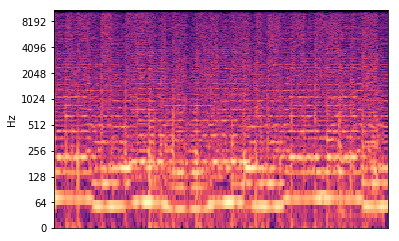

In [44]:
ref_new = np.abs(np.max(D_new))
librosa.display.specshow(librosa.amplitude_to_db(D_new, ref=ref_new), y_axis="log")

In [45]:
y_new = librosa.istft(D_new)
librosa.output.write_wav("combine.wav", y_new, sr )

In [71]:
def percussive_temp(wavfile, tempo, perc_or_harm):
    y, sr = librosa.load(wavfile)
    D = librosa.stft(y)
    D_harmonic, D_percussive = librosa.decompose.hpss(D)
    y_harmonic, y_percussive = librosa.istft(D_harmonic), librosa.istft(D_percussive)
    if perc_or_harm:
        D_harmonic = librosa.stft(librosa.effects.time_stretch(y_harmonic, tempo))
        if D_harmonic.shape[1] >= D_percussive.shape[1]:
            D_percussive = np.pad(D_percussive, ((0,0),(0,D_harmonic.shape[1]-D_percussive.shape[1])), "symmetric")
        else:
            D_harmonic = np.pad(D_harmonic, ((0,0),(0,D_percussive.shape[1]-D_harmonic.shape[1])),"constant", constant_values=(0))
    else:  
        D_percussive = librosa.stft(librosa.effects.time_stretch(y_percussive, tempo))
        if D_percussive.shape[1] >= D_harmonic.shape[1]:
            D_harmonic = np.pad(D_harmonic, ((0,0),(0,D_percussive.shape[1]-D_harmonic.shape[1])), "symmetric")
        else:
            D_percussive = np.pad(D_percussive, ((0,0),(0,D_harmonic.shape[1]-D_percussive.shape[1])),"constant", constant_values=(0))
    
    new_file = librosa.output.write_wav("new_file.wav",librosa.istft(D_harmonic + D_percussive), sr)
    return new_file

In [72]:
percussive_temp("5_second_song-youtube-Mj2XPAXlaI8-251.wav", 2, True)